<a href="https://colab.research.google.com/github/franciscojferrari/AUTOVC/blob/readme/speaker_encoder/experiments_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import SpeechEncoder as se
import numpy as np
#from SpeechEncoder import SpeechEmbedder,GE2ELoss
import importlib
#from speaker_encoder_utils import * 
#importlib.reload(se)

In [ ]:
!nvidia-smi

Tue May 18 09:13:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Experiments with random data

Experiment with random data Speech Embedder

In [ ]:
#Speech Embedder experiment
number_of_speakers = 12
utterances_per_speaker = 10
data_points = number_of_speakers *utterances_per_speaker #Number of utterances
dimension = 13 #Number of time steps
time_steps = 3 #Feature dimension
data = np.random.rand(data_points,time_steps,dimension)
model = se.SpeechEmbedder(time_steps, dimension)
prediction = model.call(data)
prediction = tf.reshape(prediction,(number_of_speakers,utterances_per_speaker,256))
prediction.shape

NameError: ignored

Experiment with random data GE2ELoss

In [ ]:
loss_model = se.GE2ELoss()
loss = loss_model(prediction)
loss

## Load data

Mounting the bucket

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/KTH/Speech/deep-speaker-master

/content/gdrive/MyDrive/KTH/Speech/deep-speaker-master


In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  93962      0 --:--:-- --:--:-- --:--:-- 97576
OK
72 packages can be upgraded. Run 'apt list --upgradable' to see them.
gcsfuse is already the newest version (0.35.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 72 not upgraded.


In [ ]:
!mkdir DataSet
!gcsfuse autovc_datasets DataSet

mkdir: cannot create directory ‘DataSet’: File exists
2021/05/21 09:04:50.725388 Using mount point: /content/gdrive/MyDrive/KTH/Speech/deep-speaker-master/DataSet
2021/05/21 09:04:50.734099 Opening GCS connection...
2021/05/21 09:04:51.061228 Mounting file system "autovc_datasets"...
2021/05/21 09:04:51.062941 File system has been successfully mounted.


Read the data

In [ ]:
! pip install -q tensorflow-io

In [ ]:
! pip install tensorflow_datasets

In [ ]:
cd /content/gdrive/MyDrive/KTH/Speech/deep-speaker-master

/content/gdrive/MyDrive/KTH/Speech/deep-speaker-master


In [ ]:
import tensorflow as tf
import DataProcessing as dp
from utils_data import *

import matplotlib.pyplot as plt
import tensorflow_io as tfio

import importlib
import yaml


from google.colab import auth
from pathlib import Path
from tqdm import tqdm 

In [ ]:
config = yaml.load(Path("config.yml").read_text(), Loader=yaml.SafeLoader)
bucket_name = config["bucket_name"]  # Name of how bucket is mounted
datasets = ["dev-clean"] # empty for vctk since there is just one
reader = dp.DataReader(config)
reader.load_datasets()

{'label': <tf.Tensor: shape=(), dtype=int64, numpy=1272>, 'subset': <tf.Tensor: shape=(), dtype=string, numpy=b'train'>, 'mel_spectrogram': <tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\x08\x01\x12\t\x12\x03\x08\x80\x01\x12\x02\x08P"\x80\xc0\x02\xe8\xbdI?5Y\xef>\x8a\xb47?{<=?y\xb8\xfe>\x1c\x95$?\x88\xda.?\x8e\xc4\xff>\xab\x80\x17?+Z(?X\xc9\x0e?\x1b\x838?3\xbaJ?\xca`(?\xee\xbd-?y\xed=?\xeeN#?\xc4\xde\x19?\xe3\x829?\xf9\x0f\x1e?\x1d\xd1\x03?\xab\xfb\x05?\xbd\xbf\x02?\x045\x04?z\x98&?=\xbb\x18? \xf1\t?c]+?\xc00\x15?\x1e,\x17?%,(?i\t\x10?\x85\x1c\x10?\xce%\x16?/\xcf\x19?e\xed\x0f?\xb1\xd5\xfb>:\r\xfe>v\x9b\xfb>!U\xdf>\xa0\x85\xe1>(\xe5\xca>4\x8a\xc7>\xf2\xf3\xda>\x87!\xdd>\x1e\xd6\xed>9N\xeb>j\xc5\xe5>v\xcc\xe2>\xecH\xbe>\x90\\\xb6>R\xff\xa0>iN\x90>\xc9-j>\x1c\xd6L>\xe0\xa0=>P\xecQ>\x1f\xdbd>B(\x9b>\x11Y\x8e>\x98}\x80>v q>\xf5C\x82>\xef\xee\x8b>\xd5\xc4u>\x95PK>\xff<M>3=d> \x02z>\xad\x9d\x86>\x89\xbd\xa0>\x0c\x83\xb7>\xec\xa0\xb2>\xba\xd7\xa7>\xceC\xa7>[\xd5\xbb>G\xa6\xcd>\x96\xa1

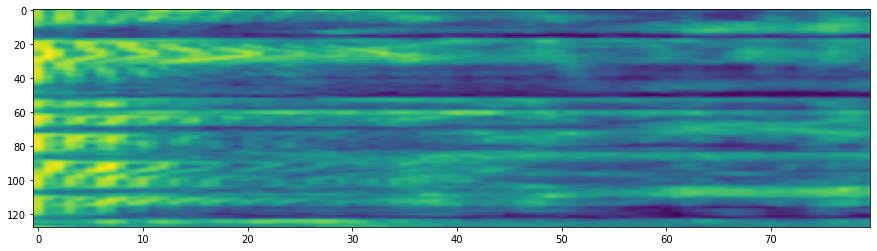

{'label': <tf.Tensor: shape=(), dtype=int64, numpy=1272>, 'subset': <tf.Tensor: shape=(), dtype=string, numpy=b'train'>, 'mel_spectrogram': <tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\x08\x01\x12\t\x12\x03\x08\x80\x01\x12\x02\x08P"\x80\xc0\x023;E?I\x97X?c%??*+\x1e?P:>?\xa2*R?\xa8\xa9Q?\x8f\xa4:?\x1e\x8b8?\x8d\x86E?Y\x07I?\xb2\x80B?\xd8V/?9\xaf\x1b?o]\x0b?\x8b\xa9\x05?\xe5\xd8\n?\x1a\xc7\x0b?Y\xa5\x10?S\xc4\x12?\x06\xa1\x13?|\xd4\x05?\ta\xdd>M\xff\xd9>m\xf8\xe1>\x82q\xd8>[\t\xd8>\xf8a\xd2>\x0cS\xc7>\xc9_\xd0>\x1ce\xb4>iN\xc9>G\xbe\xd3>2+\xde>\xa1(\xe2>\xf9\x84\xd9>6\x13\xd5>\xd7\x95\xc2>\x1b)\xc2>{1\xd2>\xb9#\xca>\xac%\xc3>\xc4^\xd3>\x1e\xd5\xea>\xf7u\x02?\xf7\xc6\x0e?\x95\xb6\x0f?A\xe0\x11?+\t\x15?\xd0d\t?n\x89\xfd>\xac\x1a\x0f?Tl\x0c?^~\x0f?U\x00\x00?\xd0\xcc\xec>Q\x84\xe4>\x17\x88\xea>\x06\x05\xea>O\xab\xf3>\xb2.\xde>|-\xdb>\xbe\\\xeb>Y\xc4\xfb>\xbc\xef\xe9>\xd4\xc1\xe0>\x91\x1c\xec>\xa5\xea\xf3>E\x84\xe9>\x87\xf3\xe1>MP\xf9>\xe4\xb4\x00?\xaa\x14\x06?%`\x0b?\xf3\x7f\x05?\x

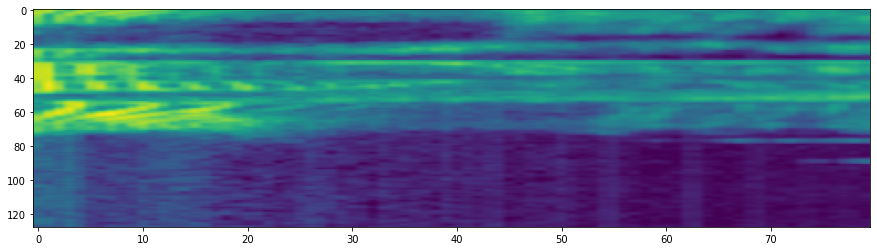

{'label': <tf.Tensor: shape=(), dtype=int64, numpy=1272>, 'subset': <tf.Tensor: shape=(), dtype=string, numpy=b'train'>, 'mel_spectrogram': <tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\x08\x01\x12\t\x12\x03\x08\x80\x01\x12\x02\x08P"\x80\xc0\x02\xe4\xae:?\xc2)[?\xac\x9cA?\x04\n\x05?t\xf2\t?]\xe2>?\xdf\xa2I?\xdd\xe1+?G\x83\x05?bI%?\x1a\xebC?=V<?\x15\n\x17?\x19Q\x01?B\x99"?\x16\xe46?\xe5C!?\'\xa8\x07?\xa4\x83\x0f?Z6/?\xb3\x036?W\x9a\x1d?\xdfz\t?\xbel\xf2>\xad\x80\x04?*L\x00?\xcd\x7f\xe8>\x1eL\xc8>I/\xe0>\xe1\xc6\xf0>\x8a\xe7\xd7>@>\xbb>+\x1c\xb0>\x02:\xbe>LA\xb6>d\x8b\xc2>Q\x1d\xa7>\x1eA\xa7>\xcd\xf0\x8f>\xadn\x85>\xb5\x9dw>4\xcb\x83>\x9e\xfdg>\xf1]6>\xf3zD>\xc3iX>\xd2"\x81>\x1aQZ>F*\x81>\x16\x19\x8a>X\xe9\x95>\x1cI\xa4>UXk>~!\x1b>\xf1\xc0G>7>S>\x18\x06X>q\xdb\x89>ki\xa0>H\xdf\xaf>\x0b\xdf\xab>\xf7\xb8\x7f>\xeep^>\x7f\x04W>?Fx>sm\x84> 5n>\x9a_f>\xe4v\x8a>\x16\xb0\xb8>K0\xbb>U\xdb\xbe>h\xa6\x9a>\x11\xbd\x84>\x01 v>\xf1r\x95>4\x0f\xb2>\xbd)\x9f>\xc0\x8d\xa2>\x00\x1d\xc2>\xc78;?\xb

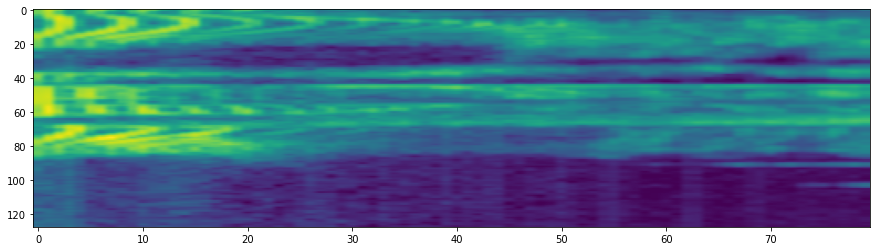

In [ ]:
datasets = reader.get_datasets()
dataset = datasets["1272"]
for example in dataset.take(3):
  print(example)

  # Parse the specgrogram (binary -> tensor)
  example = parse_spectrograms(example)

  # Plot spectrogram
  tensor = example["mel_spectrogram"].numpy()
  plt.figure(figsize=(15,4))
  plt.imshow(tensor, aspect="auto")
  plt.show()

In [ ]:
datasets.keys()

dict_keys(['1272', '1462', '1673', '174', '1919', '1988', '1993', '2035', '2078', '2086', '2277', '2412', '2428', '251', '2803', '2902', '3000', '3081', '3170', '3536', '3576', '3752', '3853', '422', '5338', '5536', '5694', '5895', '6241', '6295', '6313', '6319', '6345', '652', '777', '7850', '7976', '8297', '84', '8842'])

## Experiments with real data

In [ ]:
number_of_speakers = 5
utterances_per_speaker = 6
batches = 1000
batch = create_batches(reader.datasets,number_of_speakers,utterances_per_speaker)
padded = batch.to_tensor(-1.)

data_points = padded.shape[0]
dimension = padded.shape[2]
time_steps = padded.shape[1]   #Number of time steps

In [ ]:
from tqdm import tqdm
def create_dataset(number_of_batches, dataset, test_set, number_of_speakers,utterances_per_speaker):
  batch_dataset = []
  for _ in tqdm(range(number_of_batches)):
    batch = create_batches(dataset, test_set, number_of_speakers,utterances_per_speaker)
    batch_dataset.append(batch)
  #batch_dataset = tf.ragged.stack(batch_dataset, axis=0)
  return batch_dataset

In [ ]:
test_set = ["1272", "1462", "1673", "1993", "1988", "1919", "174", "2035", "2078", "2086"] 
batch_dataset = create_dataset(batches,reader.datasets,test_set,number_of_speakers,utterances_per_speaker)

In [ ]:
!curl ipinfo.io

In [ ]:
model = se.SpeechEmbedder(time_steps, dimension)
prediction = model(batch_dataset)
prediction = tf.reshape(prediction,(number_of_speakers,utterances_per_speaker,256))
prediction.shape
print(type(prediction))
loss_model = se.GE2ELoss()
loss = loss_model(prediction)
loss

## Training the model

In [ ]:
importlib.reload(se)
import keras
import random

epochs = 30
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model = se.SpeechEmbedder(time_steps, dimension)
loss = se.GE2ELoss()

for epoch in tqdm(range(epochs)):
    print("\nStart of epoch %d" % (epoch,))
    #random.shuffle(batch_dataset)
    for step, x_batch_train in enumerate(batch_dataset):
        x_batch_train = x_batch_train.to_tensor(-1.)
        if step % 100 == 0:
          print(step)
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            logits = tf.reshape(logits,(number_of_speakers,utterances_per_speaker,256))
            loss_value = loss(logits)

        grads = tape.gradient(loss_value, model.trainable_variables + loss.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables + loss.trainable_variables))        
    print(
        "Training loss (for one batch) at epoch %d: %.4f"
        % (epoch, float(loss_value))
    )
model.save("model_trained")


In [ ]:
model_trained = model

# Load the trained model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
new_model = tf.keras.models.load_model("/content/gdrive/MyDrive/trained_model/content/model_trained")

In [ ]:
new_model.summary()

Model: "speech_embedder_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_3 (Masking)          multiple                  0         
_________________________________________________________________
lstm1 (LSTM)                 multiple                  4888      
_________________________________________________________________
lstm2 (LSTM)                 multiple                  1404      
_________________________________________________________________
lstm3 (LSTM)                 multiple                  1404      
_________________________________________________________________
embedding (Dense)            multiple                  3584      
Total params: 11,280
Trainable params: 11,280
Non-trainable params: 0
_________________________________________________________________


# Experiments

## Experiment 1: Training loss

In [ ]:
loss = [28.6574,26.7037,17.4993,12.6446,10.8447,10.3227,8.5092,7.5094,4.6989,6.4434,1.1105,3.7451,2.8392,3.6815,0.9446,0.5358,0.8064,0.7532,2.2645,0.8575,0.4211,0.9265,3.3693,0.8331,0.4212,0.3358,0.2759,0.7669,0.1292,0.1788]
epochs = list(range(30))
plt.plot(epochs,loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

## Experiment 2: Clustering

In [ ]:
speakers = ["1272", "1462", "1673", "1993", "1988", "1919", "174", "2035", "2078", "2086"] 

datasets = reader.get_datasets()
speaker_embeddings = []
speaker_ids = []
nr_utterances = []

speaker_dict = {}
for speaker_id in speakers:
    dataset = datasets[speaker_id]
    speaker_emb = []
    for data in dataset.take(-1):
        data = parse_spectrograms(data)
        mel = data["mel_spectrogram"]
        mel = tf.expand_dims(mel, axis=0)
        embedding = new_model(mel)
        speaker_embeddings.append(embedding.numpy().reshape(-1))
        speaker_emb.append(embedding.numpy().reshape(-1))
        speaker_ids.append(speaker_id)
    nr_utterances.append(len(speaker_emb))
    speaker_dict[speaker_id] = speaker_emb


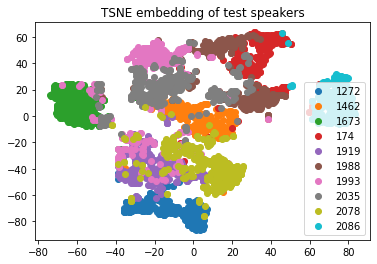

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

from sklearn.manifold import TSNE

colors_test = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

X_embedded_tsne = TSNE(n_components=2).fit_transform(np.array(speaker_embeddings))

df = pd.DataFrame(data=X_embedded_tsne, columns=["x", "y"])
df["label"] = speaker_ids

#Getting unique labels
unique_speaker_ids = np.unique(speaker_ids)
 
#plotting the results:
for idx, i in enumerate(unique_speaker_ids):
  color = colors_test[idx]
  plt.scatter(df[df["label"] == i]["x"] , df[df["label"] == i]["y"], label = int(i), color=color)
plt.legend()
plt.title('TSNE embedding of test speakers')
plt.show()

## Experiment 3: Cosine similarity

In [ ]:
import random

speakers = ["1272", "1462", "1673", "1993", "1988", "1919", "174", "2035", "2078", "2086"] 

use_pre_trained = False

utterance_dict = {}
utterance_dict[0] = {}
utterance_dict[1] = {}

for speaker in speakers[:6]:
    dataset = datasets[speaker].shuffle(100).take(2)
    for i, data in enumerate(dataset):
        data = parse_spectrograms(data)
        mel = data["mel_spectrogram"]
        if use_pre_trained:
            utterance_dict[i][speaker] = embedding
        else:
            mel = tf.expand_dims(mel, axis=0)
            embedding = model_trained(mel)
            utterance_dict[i][speaker] = embedding

In [ ]:
from scipy.spatial import distance
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


score_m = np.zeros(shape=(len(utterance_dict[0].values()), len(utterance_dict[1].values())))

for i, utterance_0 in enumerate(utterance_dict[0].values()):
    for j, utterance_1 in enumerate(utterance_dict[1].values()):
        score_m[i][j] = sklearn.metrics.pairwise.cosine_similarity(utterance_0.numpy().reshape(1, -1), utterance_1.numpy().reshape(1, -1))

x_axis_labels = ["1272_A", "1462_A", "1673_A", "1993_A", "1988_A", "1919_A"]
y_axis_labels = ["1272_B", "1462_B", "1673_B", "1993_B", "1988_B", "1919_B"]
ax = sns.heatmap(score_m, xticklabels=x_axis_labels, yticklabels=y_axis_labels,linewidth=0.5)
plt.title('Cosine similarity')

plt.show()

## Experiment 4: Silhouette score

In [ ]:
import random

speakers = ["1272", "1462", "1673", "1993", "1988", "1919", "174", "2035", "2078", "2086"] 
embeddings = []
labels = []
for speaker in speakers:
    dataset = datasets[speaker].take(-1)
    for i, data in enumerate(dataset):
        data = parse_spectrograms(data)
        mel = data["mel_spectrogram"]
        mel = tf.expand_dims(mel, axis=0)
        embedding = new_model(mel)
        embeddings.append(embedding[0])
        labels.append(speaker)
    

In [ ]:
embeddings[1]

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([-0.06930881,  0.10706372, -0.02620606,  0.01685653,  0.00553075,
       -0.04258111,  0.11710817,  0.05220096, -0.08377776,  0.06880407,
        0.00537441,  0.04472445,  0.12656346,  0.08113889, -0.08363404,
        0.11050081, -0.06744307, -0.01864018, -0.02009983, -0.07761219,
       -0.06883834,  0.02339087, -0.03284288,  0.02302087,  0.02480895,
       -0.06159633, -0.13640323, -0.11092074, -0.04671194,  0.05179928,
       -0.01747662, -0.05270808, -0.05507164,  0.0979254 , -0.12275921,
       -0.02219325,  0.11488406, -0.05940494,  0.07660946, -0.11498792,
       -0.01873073, -0.00157789, -0.03688483,  0.0913138 , -0.03345613,
        0.10441901,  0.06177364,  0.03021604, -0.00789754,  0.01079837,
       -0.0517663 , -0.08802978,  0.05566179, -0.09612335, -0.07883735,
        0.0351441 ,  0.01508783, -0.03888107, -0.07854909,  0.04333077,
        0.09106523,  0.00708852, -0.07437121,  0.13086101,  0.02651091,
        0.012769

In [ ]:
# Calculate the overall average silhouette score
import sklearn
silhouette_avg = sklearn.metrics.silhouette_score(np.array(embeddings),  labels)

In [ ]:
silhouette_avg

0.17839459

In [ ]:
# Find the score per data point, for plotting
cluster_labels = np.array(labels)
sample_silhouette_values = sklearn.metrics.silhouette_samples(np.array(embeddings),  cluster_labels)

In [ ]:
# Convert the data to a dataframe for easier manipulation
import pandas as pd
df = pd.DataFrame(columns=["label", "score"])
df["label"] = labels
df["score"] = sample_silhouette_values

([<matplotlib.axis.XTick at 0x7efff0520850>,
 <a list of 7 Text major ticklabel objects>)

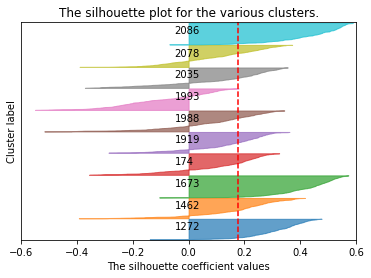

In [ ]:
import matplotlib.cm as cm

nr_clusters = len(list(np.unique(labels)))

# Create a subplot with 1 row and 2 columns
#fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
plt.xlim([-0.6, 0.6])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
plt.ylim([0, len(labels) + (nr_clusters + 1) * 10])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

y_lower = 10
for i, label in enumerate(np.unique(labels)):
  # ith_cluster_silhouette_values = sample_silhouette_values[labels == label]
  ith_cluster_silhouette_values = df[df["label"] == label]["score"]
  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  ith_cluster_silhouette_values = ith_cluster_silhouette_values.sort_values()

  y_upper = y_lower + size_cluster_i

  #color = cm.nipy_spectral(float(i) / nr_clusters)
  color = colors[i]
  plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

  # Label the silhouette plots with their cluster numbers at the middle
  plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(label))

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6])


## Compare to baseline

In [ ]:
pip install -r requirements.txt

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 382, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/legacy_resolve.py", line 201, in resolve
    self._resolve_one(requirement_set, req)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/legacy_resolve

In [ ]:
import random

import numpy as np

from audio import read_mfcc
from batcher import sample_from_mfcc
from constants import SAMPLE_RATE, NUM_FRAMES
from conv_models import DeepSpeakerModel
from test import batch_cosine_similarity

In [ ]:
# Reproducible results.
np.random.seed(123)
random.seed(123)

# Define the model here.
model = DeepSpeakerModel()

In [ ]:
# Load the checkpoint. https://drive.google.com/file/d/1F9NvdrarWZNktdX9KlRYWWHDwRkip_aP.
# Also available here: https://share.weiyun.com/V2suEUVh (Chinese users).
model.m.load_weights('ResCNN_triplet_training_checkpoint_265.h5', by_name=True)

In [ ]:
#writer = dp.DataWriter(config["bucket_name"], ["dev-clean"], config) # TODO check dataset
#embedding.numpy().reshape(-1)
speakers = ["1272", "1462", "1673", "1993", "1988", "1919", "174", "2035", "2078", "2086"] 
data_path = config["dataset"]["dev-clean"]
dataset_path = os.path.join(
    config["bucket_name"], data_path
)
speaker_ids_load, speaker_paths = find_speaker_paths(dataset_path)

speaker_dict = {}
speaker_embeddings = []
speaker_ids = []

for speaker_path, speaker_id in zip(speaker_paths, speaker_ids_load):
    
    print(f"Processing data for speaker: {speaker_id}")
    
    label = int(speaker_id)
    
    if str(label) in speakers:
      speaker_em = []
      file_paths = find_flac_paths(speaker_path)
      for file_ut in file_paths: 
        mfcc_001 = sample_from_mfcc(read_mfcc(file_ut, SAMPLE_RATE), NUM_FRAMES)
        predict_001 = model.m.predict(np.expand_dims(mfcc_001, axis=0))[0]
        speaker_em.append(predict_001)
        speaker_embeddings.append(predict_001)
        speaker_ids.append(label)
        
      speaker_dict[speaker_id] = speaker_em

Processing data for speaker: 1272
Processing data for speaker: 1462
Processing data for speaker: 1673
Processing data for speaker: 174
Processing data for speaker: 1919
Processing data for speaker: 1988
Processing data for speaker: 1993
Processing data for speaker: 2035
Processing data for speaker: 2078
Processing data for speaker: 2086
Processing data for speaker: 2277
Processing data for speaker: 2412
Processing data for speaker: 2428
Processing data for speaker: 251
Processing data for speaker: 2803
Processing data for speaker: 2902
Processing data for speaker: 3000
Processing data for speaker: 3081
Processing data for speaker: 3170
Processing data for speaker: 3536
Processing data for speaker: 3576
Processing data for speaker: 3752
Processing data for speaker: 3853
Processing data for speaker: 422
Processing data for speaker: 5338
Processing data for speaker: 5536
Processing data for speaker: 5694
Processing data for speaker: 5895
Processing data for speaker: 6241
Processing data f

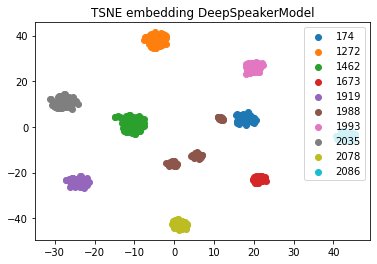

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

from sklearn.manifold import TSNE



colors_test = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


X_embedded_tsne = TSNE(n_components=2).fit_transform(np.array(speaker_embeddings))

df = pd.DataFrame(data=X_embedded_tsne, columns=["x", "y"])
df["label"] = speaker_ids

#Getting unique labels
unique_speaker_ids = np.unique(speaker_ids)
 
#plotting the results:
for idx, i in enumerate(unique_speaker_ids):
  color = colors_test[idx]
  plt.scatter(df[df["label"] == i]["x"] , df[df["label"] == i]["y"], label = int(i), color=color)
plt.legend()
plt.title('TSNE embedding DeepSpeakerModel')
plt.show()

In [ ]:
### Sihlouette score

In [ ]:
# Calculate the overall average silhouette score
import sklearn
silhouette_avg = sklearn.metrics.silhouette_score(np.array(speaker_embeddings),  speaker_ids)

In [ ]:
silhouette_avg

0.26174375

In [ ]:
# Find the score per data point, for plotting
cluster_labels = np.array(speaker_ids)
sample_silhouette_values = sklearn.metrics.silhouette_samples(np.array(speaker_embeddings),  cluster_labels)

In [ ]:
# Convert the data to a dataframe for easier manipulation
import pandas as pd
df = pd.DataFrame(columns=["label", "score"])
df["label"] = speaker_ids
df["score"] = sample_silhouette_values

([<matplotlib.axis.XTick at 0x7efff525fcd0>,
 <a list of 4 Text major ticklabel objects>)

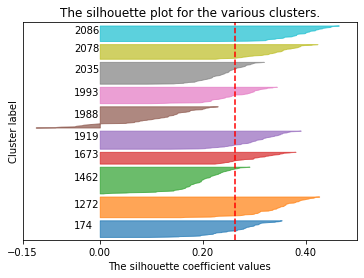

In [ ]:
import matplotlib.cm as cm

nr_clusters = len(list(np.unique(speaker_ids)))

# Create a subplot with 1 row and 2 columns
#fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
plt.xlim([-0.15, 0.5])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
plt.ylim([0, len(speaker_ids) + (nr_clusters + 1) * 10])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

y_lower = 10
for i, label in enumerate(np.unique(speaker_ids)):
  # ith_cluster_silhouette_values = sample_silhouette_values[labels == label]
  ith_cluster_silhouette_values = df[df["label"] == label]["score"]
  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  ith_cluster_silhouette_values = ith_cluster_silhouette_values.sort_values()

  y_upper = y_lower + size_cluster_i

  #color = cm.nipy_spectral(float(i) / nr_clusters)
  color = colors[i]
  plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

  # Label the silhouette plots with their cluster numbers at the middle
  plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(label))

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.15, 0, 0.2, 0.4])


## Experiment 4: Clustering for pre-trained model

In [ ]:
speakers = ["1272", "1462", "1673", "1993", "1988", "1919", "174", "2035", "2078", "2086"] 

datasets = reader.get_datasets()
speaker_embeddings = []
speaker_ids = []
nr_utterances = []

speaker_dict = {}
for speaker_id in speakers:
    dataset = datasets[speaker_id]
    speaker_emb = []
    for data in dataset.take(-1):
        data = parse_speaker_embedding(data)
        speaker_embedding = data["speaker_embedding"]
        speaker_embeddings.append(embedding.numpy().reshape(-1))
        speaker_emb.append(embedding.numpy().reshape(-1))
        speaker_ids.append(speaker_id)
    nr_utterances.append(len(speaker_emb))
    speaker_dict[speaker_id] = speaker_emb

In [ ]:
data

{'label': <tf.Tensor: shape=(), dtype=int64, numpy=1272>,
 'mel_spectrogram': <tf.Tensor: shape=(1,), dtype=string, numpy=
 array([b'\x08\x01\x12\t\x12\x03\x08\x80\x01\x12\x02\x08P"\x80\xc0\x02\xe8\xbdI?5Y\xef>\x8a\xb47?{<=?y\xb8\xfe>\x1c\x95$?\x88\xda.?\x8e\xc4\xff>\xab\x80\x17?+Z(?X\xc9\x0e?\x1b\x838?3\xbaJ?\xca`(?\xee\xbd-?y\xed=?\xeeN#?\xc4\xde\x19?\xe3\x829?\xf9\x0f\x1e?\x1d\xd1\x03?\xab\xfb\x05?\xbd\xbf\x02?\x045\x04?z\x98&?=\xbb\x18? \xf1\t?c]+?\xc00\x15?\x1e,\x17?%,(?i\t\x10?\x85\x1c\x10?\xce%\x16?/\xcf\x19?e\xed\x0f?\xb1\xd5\xfb>:\r\xfe>v\x9b\xfb>!U\xdf>\xa0\x85\xe1>(\xe5\xca>4\x8a\xc7>\xf2\xf3\xda>\x87!\xdd>\x1e\xd6\xed>9N\xeb>j\xc5\xe5>v\xcc\xe2>\xecH\xbe>\x90\\\xb6>R\xff\xa0>iN\x90>\xc9-j>\x1c\xd6L>\xe0\xa0=>P\xecQ>\x1f\xdbd>B(\x9b>\x11Y\x8e>\x98}\x80>v q>\xf5C\x82>\xef\xee\x8b>\xd5\xc4u>\x95PK>\xff<M>3=d> \x02z>\xad\x9d\x86>\x89\xbd\xa0>\x0c\x83\xb7>\xec\xa0\xb2>\xba\xd7\xa7>\xceC\xa7>[\xd5\xbb>G\xa6\xcd>\x96\xa1\xc1>\xcd\x0f\xc3>\xfb\xb7\xc9>K[I?\xf6\xab\r?\xb8\xdf:?[\xa5

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

from sklearn.manifold import TSNE

In [ ]:
X_embedded_tsne = TSNE(n_components=2).fit_transform(np.array(speaker_embeddings))
df = pd.DataFrame(data=X_embedded_tsne, columns=["x", "y"])
df["label"] = speaker_ids
#Getting unique labels
unique_speaker_ids = np.unique(speaker_ids)

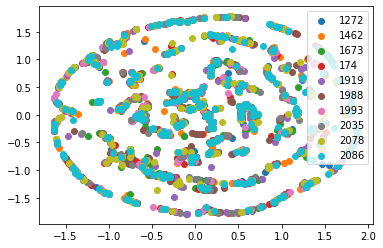

In [ ]:
#plotting the results:
for idx, i in enumerate(unique_speaker_ids):
    color = colors_test[idx]
    plt.scatter(df[df["label"] == i]["x"] , df[df["label"] == i]["y"], label = int(i), color=color)
plt.legend()
plt.show()